# **Adult Income Prediction**

**Data Set Information:**

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.


**Attribute Information:**

Age: Describes the age of individuals. Continuous.

Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: Continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: Number of years spent in education. Continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: Continuous.

capital-loss: Continuous.

hours-per-week: Continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: >50K,<=50K

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Exploratory Data Analysis and Visualization

In [ ]:
df = pd.read_csv("adult.csv")
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.info()

In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
# summarize the class distribution
from collections import Counter

# Summarize the class distribution
target = df.values[:, -1]
counter = Counter(target)
for k, v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))


Class=<=50K, Count=24720, Percentage=75.919%
Class=>50K, Count=7841, Percentage=24.081%


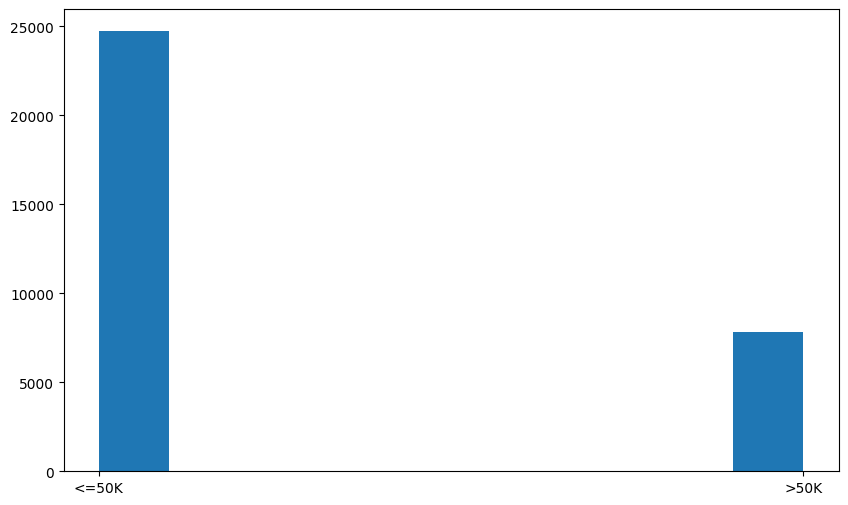

In [ ]:
plt.hist(df.income);

In [ ]:
(df['workclass'] == '?').sum()


In [ ]:
(df['workclass']).unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
((df['income'] == '<=50K') & (df['workclass'] == '?')).sum()


1645

In [ ]:
((df['income'] != '<=50K') & (df['workclass'] == '?')).sum()

191

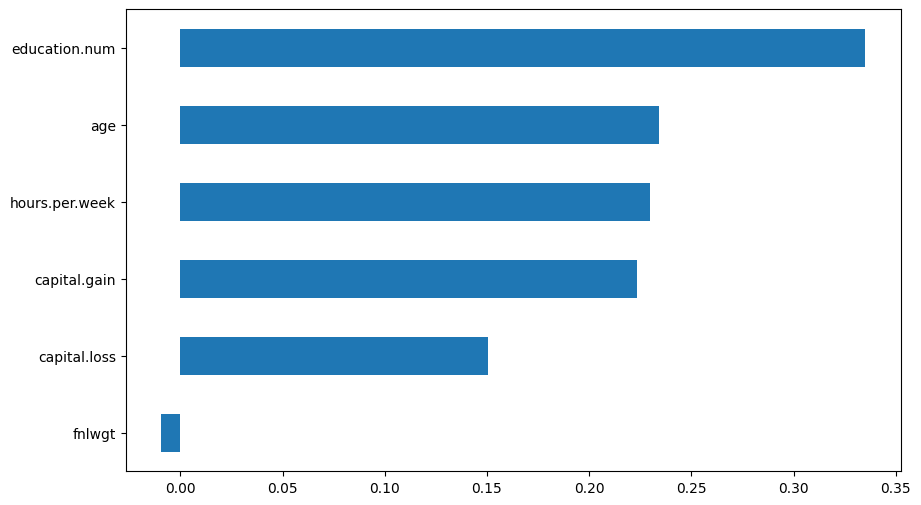

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame with only numeric columns
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Encode the "income" column using LabelEncoder to see the correlation
label_encoder = LabelEncoder()
df_numeric["income"] = label_encoder.fit_transform(df["income"])

# Calculate and plot the correlation
df_numeric.corr()["income"].drop("income").sort_values().plot.barh();



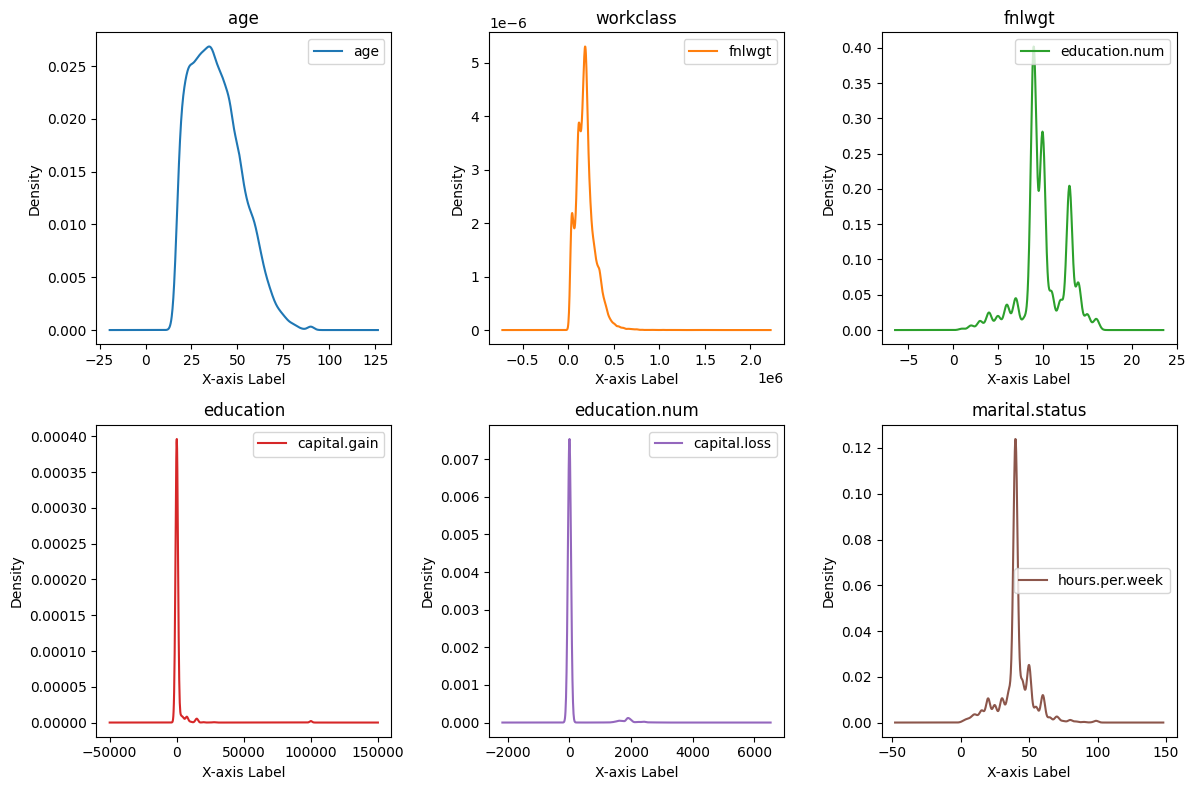

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Drawing kernel density plots for each numerical column in the data frame
df.plot(kind='density', subplots=True, ax=axes, layout=(2, 3), sharex=False, sharey=False)

# Axis labels and titles
for i, ax in enumerate(axes.flatten()):
    ax.set_title(df.columns[i])
    ax.set_xlabel('X-axis Label')
    ax.set_ylabel('Density')

# Adjusting the layout
plt.tight_layout()
plt.show()


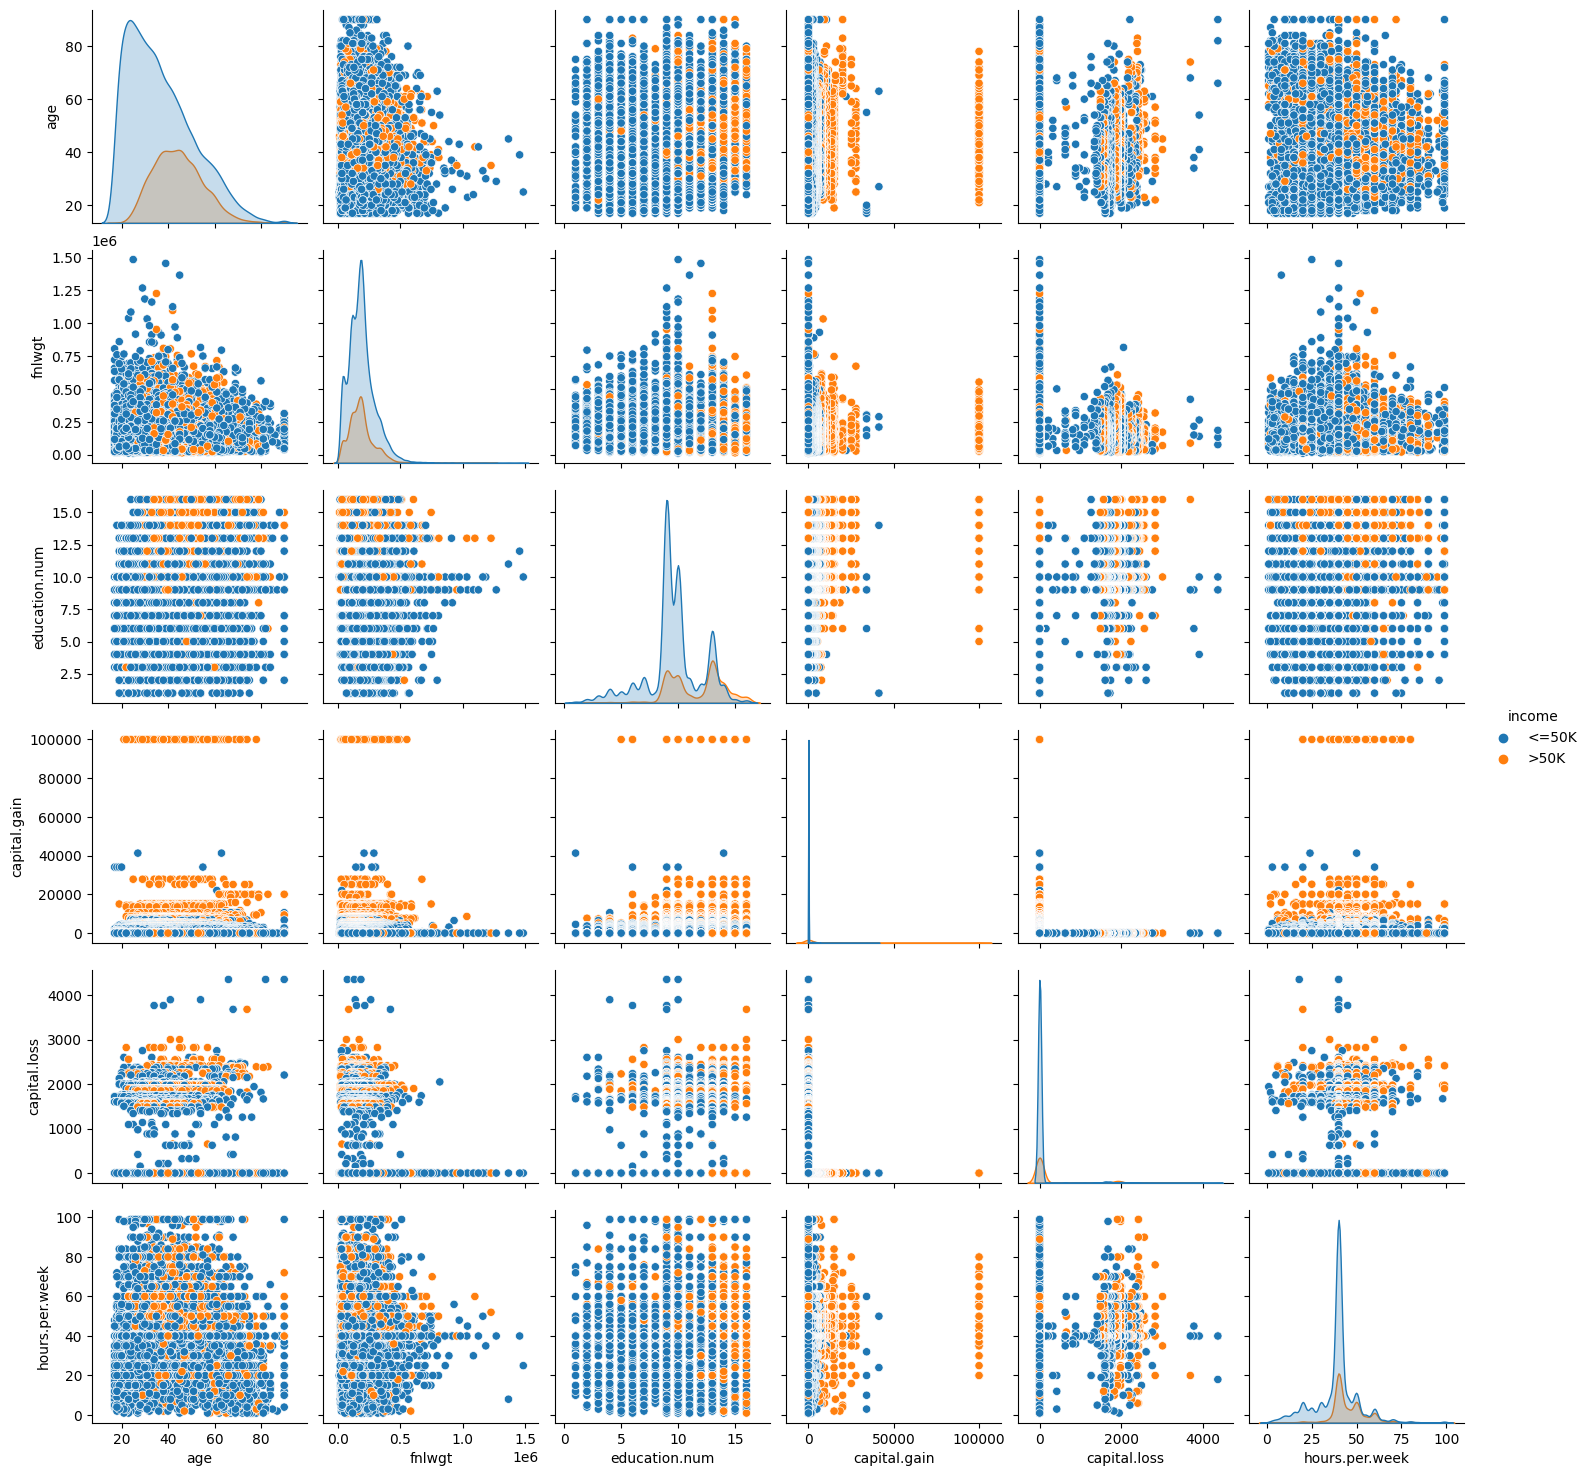

In [ ]:
sns.pairplot(df,hue='income');

In [ ]:
# We explore more about income density on age

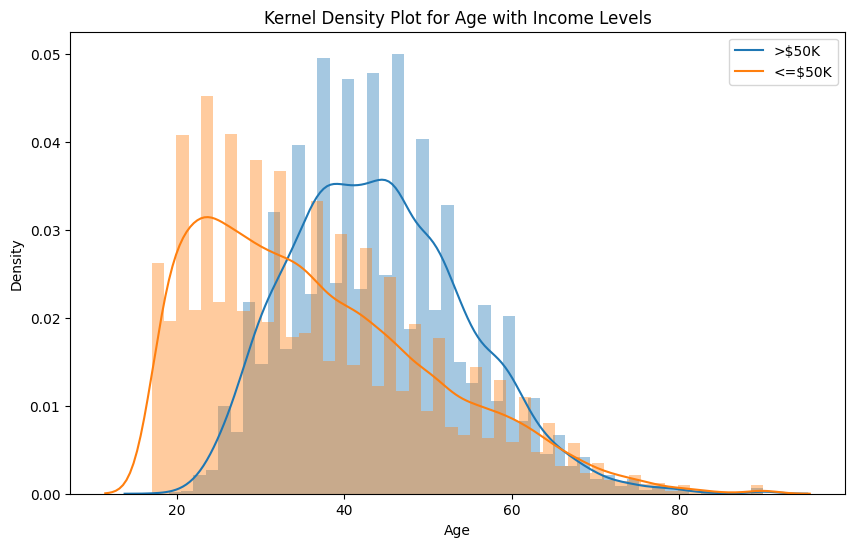

In [ ]:
#Plotting kernel density plots for different income levels
sns.distplot(df[df['income'] == '>50K']['age'], kde_kws={"label": ">$50K"})
sns.distplot(df[df['income'] == '<=50K']['age'], kde_kws={"label": "<=$50K"})

# Displaying the legend
plt.legend()

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Kernel Density Plot for Age with Income Levels')

# Show the plot
plt.show()

 Mor age more  income

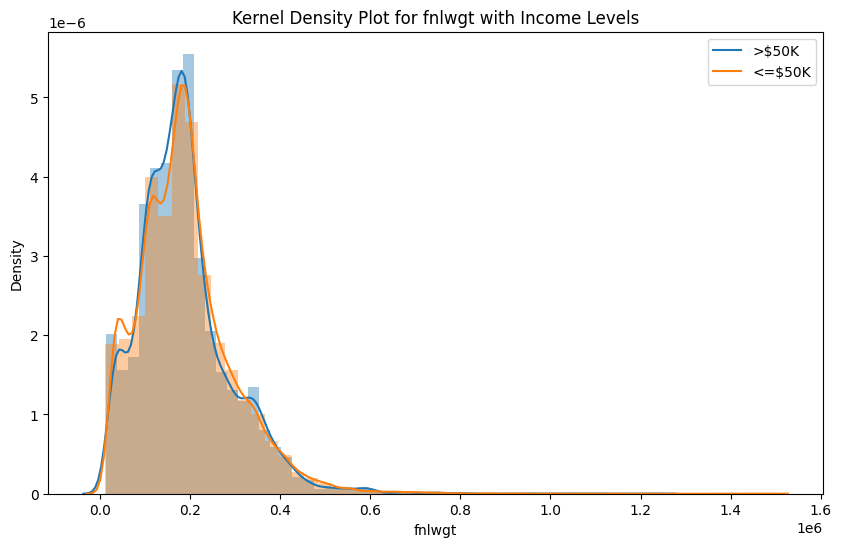

In [ ]:
#Plotting kernel density plots for different income levels
sns.distplot(df[df['income'] == '>50K']['fnlwgt'], kde_kws={"label": ">$50K"})
sns.distplot(df[df['income'] == '<=50K']['fnlwgt'], kde_kws={"label": "<=$50K"})

# Displaying the legend
plt.legend()

# Adding labels and title
plt.xlabel('fnlwgt')
plt.ylabel('Density')
plt.title('Kernel Density Plot for fnlwgt with Income Levels')

# Show the plot
plt.show()


In [ ]:
# fnlwgt has not significant affect on income range. Because it has similar pattern

# Logistic Regression

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

## Train | Test Split and Scaling

In [ ]:
X = df.drop('income',axis=1)
y = df['income']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)


In [ ]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create transformers for numeric and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline with a scaler and logistic regression
pipeline_log = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', LogisticRegression())])



In [ ]:
# Fit the model
pipeline_log.fit(X_train, y_train)

# Make predictions
y_pred = pipeline_log.predict(X_test)


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.90      2468
        >50K       0.74      0.59      0.66       789

    accuracy                           0.85      3257
   macro avg       0.81      0.76      0.78      3257
weighted avg       0.84      0.85      0.84      3257



The dataset used to build the model here is a truly imbalanced dataset, as it reflects a lack of real-world data that can help the algorithm to arrive at accurate predictions.

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
scores = cross_validate(
    pipeline_log,
    X_train,
    y_train,
    scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
    cv=10
)
df_scores = pd.DataFrame(scores)
df_scores


,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,0.538,0.094,0.852,0.806,0.772,0.787
1,0.499,0.181,0.848,0.801,0.763,0.779
2,0.581,0.120,0.857,0.815,0.776,0.793
3,0.548,0.109,0.853,0.808,0.769,0.785
4,0.485,0.078,0.856,0.814,0.771,0.789
5,0.531,0.141,0.846,0.802,0.752,0.771
6,0.594,0.094,0.845,0.798,0.755,0.773
7,0.472,0.156,NaN,NaN,NaN,NaN
8,0.484,0.078,0.862,0.821,0.784,0.800
9,0.469,0.094,0.844,0.796,0.756,0.772


I had NaN row.

In [ ]:
holand_rows = df[df['native.country'] == 'Holand-Netherlands']
holand_rows

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
211,32,Private,27882,Some-college,10,Never-married,Machine-op-inspct,Other-relative,White,Female,0,2205,40,Holand-Netherlands,<=50K


In [ ]:
# I got error when I run the code "predictions part" due to one row "Holand-Netherlands". So I removed it from dataset.

In [ ]:
X1_train = X_train[X_train['native.country'] != 'Holand-Netherlands']
y1_train = y_train[X_train['native.country'] != 'Holand-Netherlands']


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_fscore_support

# Perform cross-validation
predictions = cross_val_predict(pipeline_log, X1_train, y1_train, cv=10)

# Calculate precision, recall, and f1 for each class
precision, recall, f1, _ = precision_recall_fscore_support(y1_train, predictions, average=None)

# Display the results
results = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}, index=['<=50K', '>50K'])

print(results)

       Precision  Recall  F1-Score
<=50K      0.881   0.931     0.905
>50K       0.735   0.603     0.662


In [ ]:
scores = cross_validate(
    pipeline_log,
    X1_train,
    y1_train,
    scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
    cv=10
)
df_scores = pd.DataFrame(scores)
df_scores

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,0.506,0.079,0.852,0.806,0.772,0.787
1,0.474,0.104,0.847,0.800,0.762,0.778
2,0.615,0.115,0.858,0.816,0.777,0.793
3,0.538,0.100,0.853,0.808,0.769,0.786
4,0.598,0.130,0.856,0.814,0.771,0.788
5,0.642,0.117,0.846,0.802,0.752,0.771
6,0.617,0.128,0.846,0.800,0.756,0.774
7,0.551,0.100,0.855,0.814,0.770,0.788
8,0.968,0.129,0.862,0.821,0.784,0.800
9,0.527,0.107,0.844,0.796,0.756,0.772


In [ ]:
df_scores.mean()[2:]

test_accuracy          0.852
test_precision_macro   0.808
test_recall_macro      0.767
test_f1_macro          0.784
dtype: float64

## Best Treshold (ROC C and AUC)

In [ ]:
from sklearn.metrics import roc_auc_score


pipeline_log.fit(X_train, y_train)

y_pred_proba = pipeline_log.predict_proba(X_train)
roc_auc_score(y_train, y_pred_proba[:,1])

0.9088318643233608

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder

#
le = LabelEncoder()
y_train_binary = le.fit_transform(y_train)
# Label encoding for <=50K and >50K which are not 0  - 1

# Now, calculate the ROC curve
fp_rate, tp_rate, thresholds = roc_curve(y_train_binary, y_pred_proba[:,1])

In [ ]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.22505086395749316

In [ ]:
# when we find optimal threshold as 0.22 using ROC curve yet we will use 0.7


In [ ]:
optimal_threshold = 0.7
y_pred2 = pd.Series(pipeline_log.predict_proba(X_test)[:,0]).apply(
    lambda x : "<=50K" if x >=optimal_threshold else ">50K")


In [ ]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[2081  387]
 [ 174  615]]
              precision    recall  f1-score   support

       <=50K       0.92      0.84      0.88      2468
        >50K       0.61      0.78      0.69       789

    accuracy                           0.83      3257
   macro avg       0.77      0.81      0.78      3257
weighted avg       0.85      0.83      0.83      3257



![image.png](attachment:image.png)

Treshold = 0.7 works better than 0.22.

In [ ]:
#from ipywidgets import interactive, FloatSlider
#from IPython.display import display

In [ ]:
#y_pred = pipeline_log.predict(X_test)
#y_pred_proba = pipeline_log.predict_proba(X_test)

# K-Nearest Neighbors (KNN) Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Numeric feature selection
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [ ]:
X_train_num.head(5)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
15090,24,140001,10,0,0,40
25888,35,198202,9,0,0,54
3321,44,184105,12,4386,0,40
18983,25,69739,6,0,0,40
9942,41,152629,10,0,0,40


In [ ]:
scaler = StandardScaler()


In [ ]:
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

## Find the best K value

In [ ]:
test_error_rates = []
train_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train)

    y_pred_test = knn_model.predict(X_test_scaled)
    y_pred_train = knn_model.predict(X_train_scaled)

    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

    train_error = 1 - accuracy_score(y_train,y_pred_train)
    train_error_rates.append(train_error)

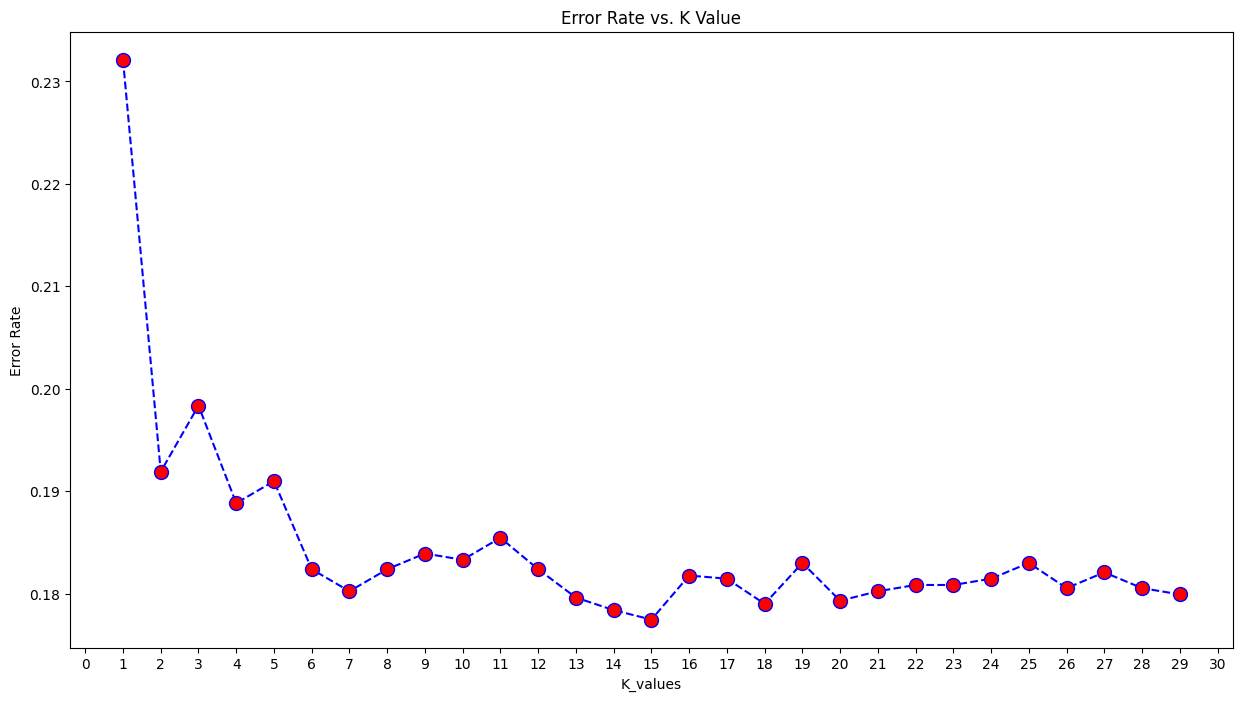

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.xticks(range(0, 31, 1));

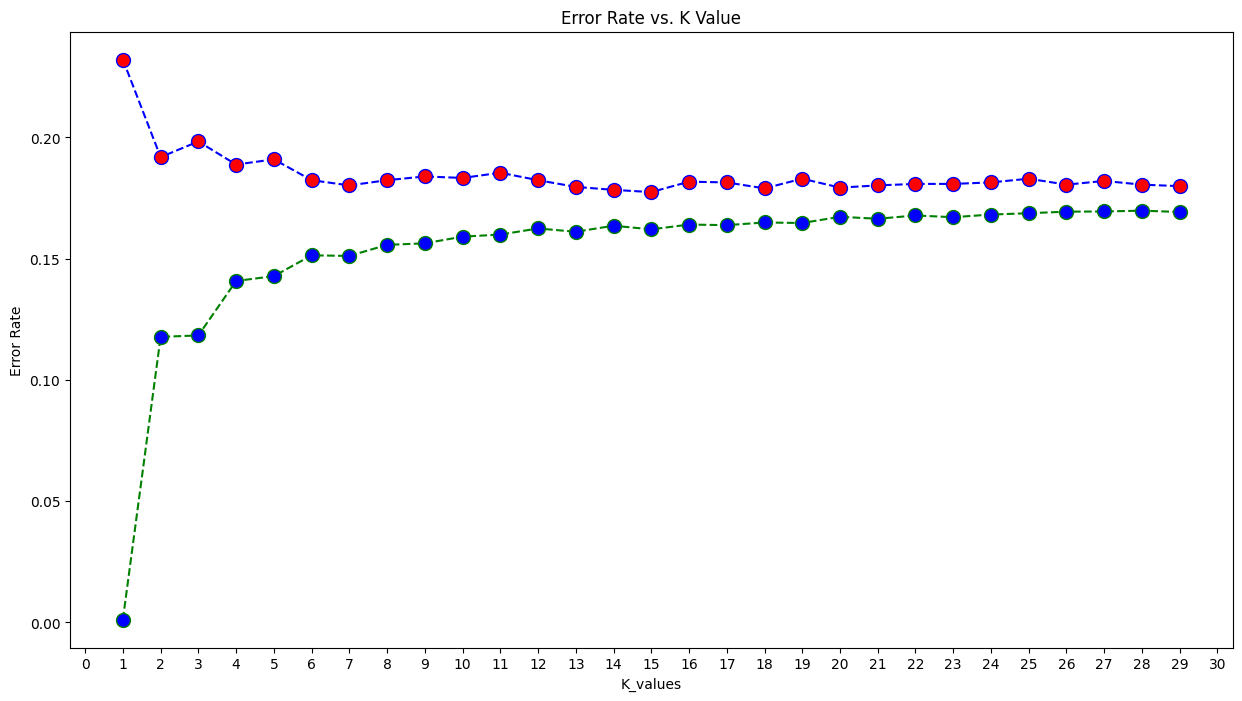

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.xticks(range(0, 31, 1));

## Scores by Best K Value

In [ ]:
    # It looks like K=7 is the best value for KNN model when looking at the  error graph

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train_scaled,y_train)
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set

[[2289  179]
 [ 408  381]]
              precision    recall  f1-score   support

       <=50K       0.85      0.93      0.89      2468
        >50K       0.68      0.48      0.56       789

    accuracy                           0.82      3257
   macro avg       0.76      0.71      0.73      3257
weighted avg       0.81      0.82      0.81      3257


Train_Set

[[21025  1227]
 [ 3202  3850]]
              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90     22252
        >50K       0.76      0.55      0.63      7052

    accuracy                           0.85     29304
   macro avg       0.81      0.75      0.77     29304
weighted avg       0.84      0.85      0.84     29304



In [ ]:
# How is k=15 perform?
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train_scaled,y_train)
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set

[[2323  145]
 [ 433  356]]
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      2468
        >50K       0.71      0.45      0.55       789

    accuracy                           0.82      3257
   macro avg       0.78      0.70      0.72      3257
weighted avg       0.81      0.82      0.81      3257


Train_Set

[[21123  1129]
 [ 3621  3431]]
              precision    recall  f1-score   support

       <=50K       0.85      0.95      0.90     22252
        >50K       0.75      0.49      0.59      7052

    accuracy                           0.84     29304
   macro avg       0.80      0.72      0.74     29304
weighted avg       0.83      0.84      0.82     29304



The score for >50K is lowered in KNN models.

## Gridsearch Method for Choosing Reasonable K Values

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
knn_grid = KNeighborsClassifier()

In [ ]:
k_values= range(1,30)

In [ ]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [ ]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv = 10, scoring= "accuracy")

In [ ]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
knn_grid_model.best_params_

{'n_neighbors': 24, 'p': 1, 'weights': 'uniform'}

GridSearch can not provide the good results in k=7 case.

## Evaluating ROC Curves and AUC

In [ ]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7).fit(X_train_scaled, y_train)


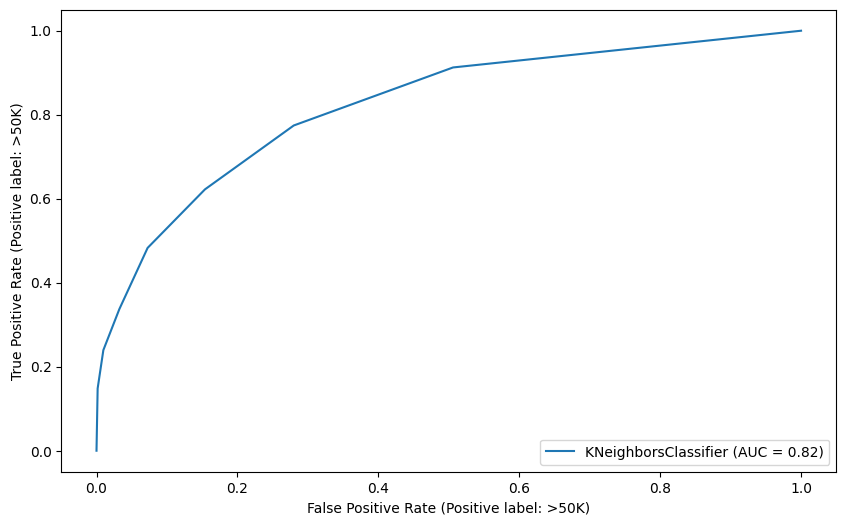

In [ ]:
plot_roc_curve(knn_model, X_test_scaled, y_test);

In [ ]:
# How is test data performance?

In [ ]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.8207165790560236

# Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline with a scaler and SVM classifier
pipeline_svm = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', SVC(kernel="linear", C=1))])

# Fit the pipeline on the training data
#pipeline_svm.fit(X, y)

# Make predictions on the test data
#y_pred = pipeline_svm.predict(X)

In [ ]:
#pip install svm_margin_plot


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement svm_margin_plot (from versions: none)
ERROR: No matching distribution found for svm_margin_plot


In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm


In [ ]:
# Convert labels in y to numerical values
#y_numeric = y.map({'<=50K': 0, '>50K': 1})

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# X_numeric contains only the numeric columns from your original dataset

X_numeric = X.select_dtypes(include=['int64', 'float64'])




# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Define the SVM model
svm_model = SVC()

# Create a pipeline with scaling for SVM
pipeline_svm = Pipeline([
    ('classifier', svm_model)
])

# Fit the pipeline on the training data
pipeline_svm.fit(X_train, y_train)

# Evaluate on the test set
accuracy = pipeline_svm.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.80


In [ ]:
from sklearn.metrics import classification_report

# Predictions on the test set
y_pred = pipeline_svm.predict(X_test)

# Classification report
class_report = classification_report(y_test, y_pred)
print(class_report)


              precision    recall  f1-score   support

       <=50K       0.79      1.00      0.88      4976
        >50K       0.96      0.14      0.25      1537

    accuracy                           0.80      6513
   macro avg       0.88      0.57      0.56      6513
weighted avg       0.83      0.80      0.73      6513



Best scores obtained in the logistic regression model with 0.7 treshold. We evaluated the best scores macro-average for unbalanced datasets.